In [13]:
## Imports for all Librarys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Imports Data Visualisatio
from matplotlib import pyplot as plt
import seaborn as sns
# Imports for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
# Load scikit-learn models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

In [14]:
df = pd.read_csv("CropRecommendation.csv")

In [15]:
# Remove crops (label) from data for splitting
y = df['label']
x = df.drop(['label'], axis = 1)

# Split data 70/30 for ML
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

print("Dataset Count for Training: ", len(X_train))
print("Dataset Count for Testing: ", len(X_test))

Dataset Count for Training:  1540
Dataset Count for Testing:  660


In [45]:
NBC_Model = GaussianNB(priors = None, var_smoothing = 1e-12) #https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

NBC_fitted = NBC_Model.fit(X_train, Y_train)
Y_prediction_NBC = NBC_fitted.predict(X_test)
score = accuracy_score(Y_test, Y_prediction_NBC)
score_percent = score * 100
print("Naive Baies Classifier: ", 'Accuracy score: %.3f' % score_percent, "%")

Naive Baies Classifier:  Accuracy score: 99.545 %


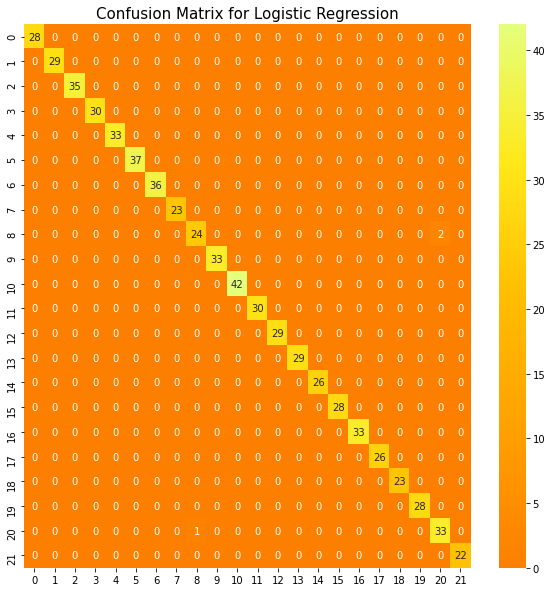

In [36]:
#Evaluating Model Performance by using confusion matrix
plt.rcParams['figure.figsize'] = [10,10]
cm_NB = confusion_matrix(Y_test, Y_prediction_NBC)
sns.heatmap(cm_NB, annot = True, cmap = 'Wistia_r')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [28]:
#Printing Classification Report
cr_NB = classification_report(Y_test, Y_prediction_NBC)
print(cr_NB)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        23
        jute       0.96      0.92      0.94        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        42
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

In [17]:
RFC_Model = RandomForestClassifier()
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python

RFC_Model = RFC_Model.fit(X_train, Y_train)
Y_prediction_RFC = RFC_Model.predict(X_test)
score = accuracy_score(Y_test, Y_prediction_RFC)
score_percent = score * 100
print("Naive Baies Classifier: ", 'Accuracy score: %.3f' % score_percent, "%")

Naive Baies Classifier:  Accuracy score: 99.545 %


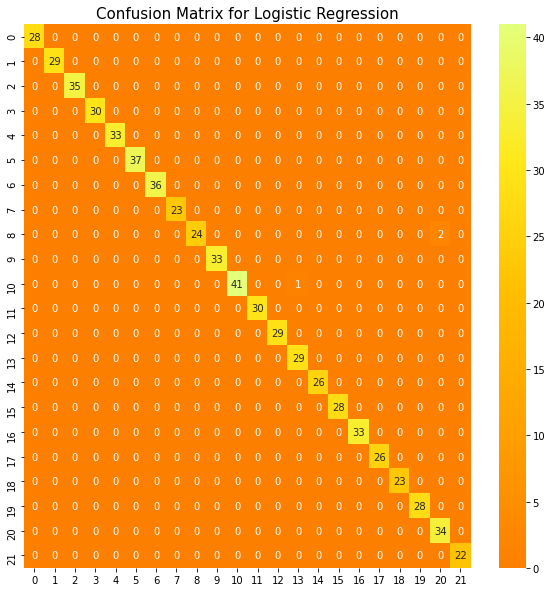

In [35]:
#Evaluating Model Performance by using confusion matrix
plt.rcParams['figure.figsize'] = [10,10]
cm_NB = confusion_matrix(Y_test, Y_prediction_RFC)
sns.heatmap(cm_NB, annot = True, cmap = 'Wistia_r')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [30]:
#Printing Classification Report
cr_NB = classification_report(Y_test, Y_prediction_RFC)
print(cr_NB)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        29
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        37
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        23
        jute       1.00      0.92      0.96        26
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      0.98      0.99        42
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      1.00      0.98        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        28
      orange       1.00      1.00      1.00        33
      papaya       1.00    

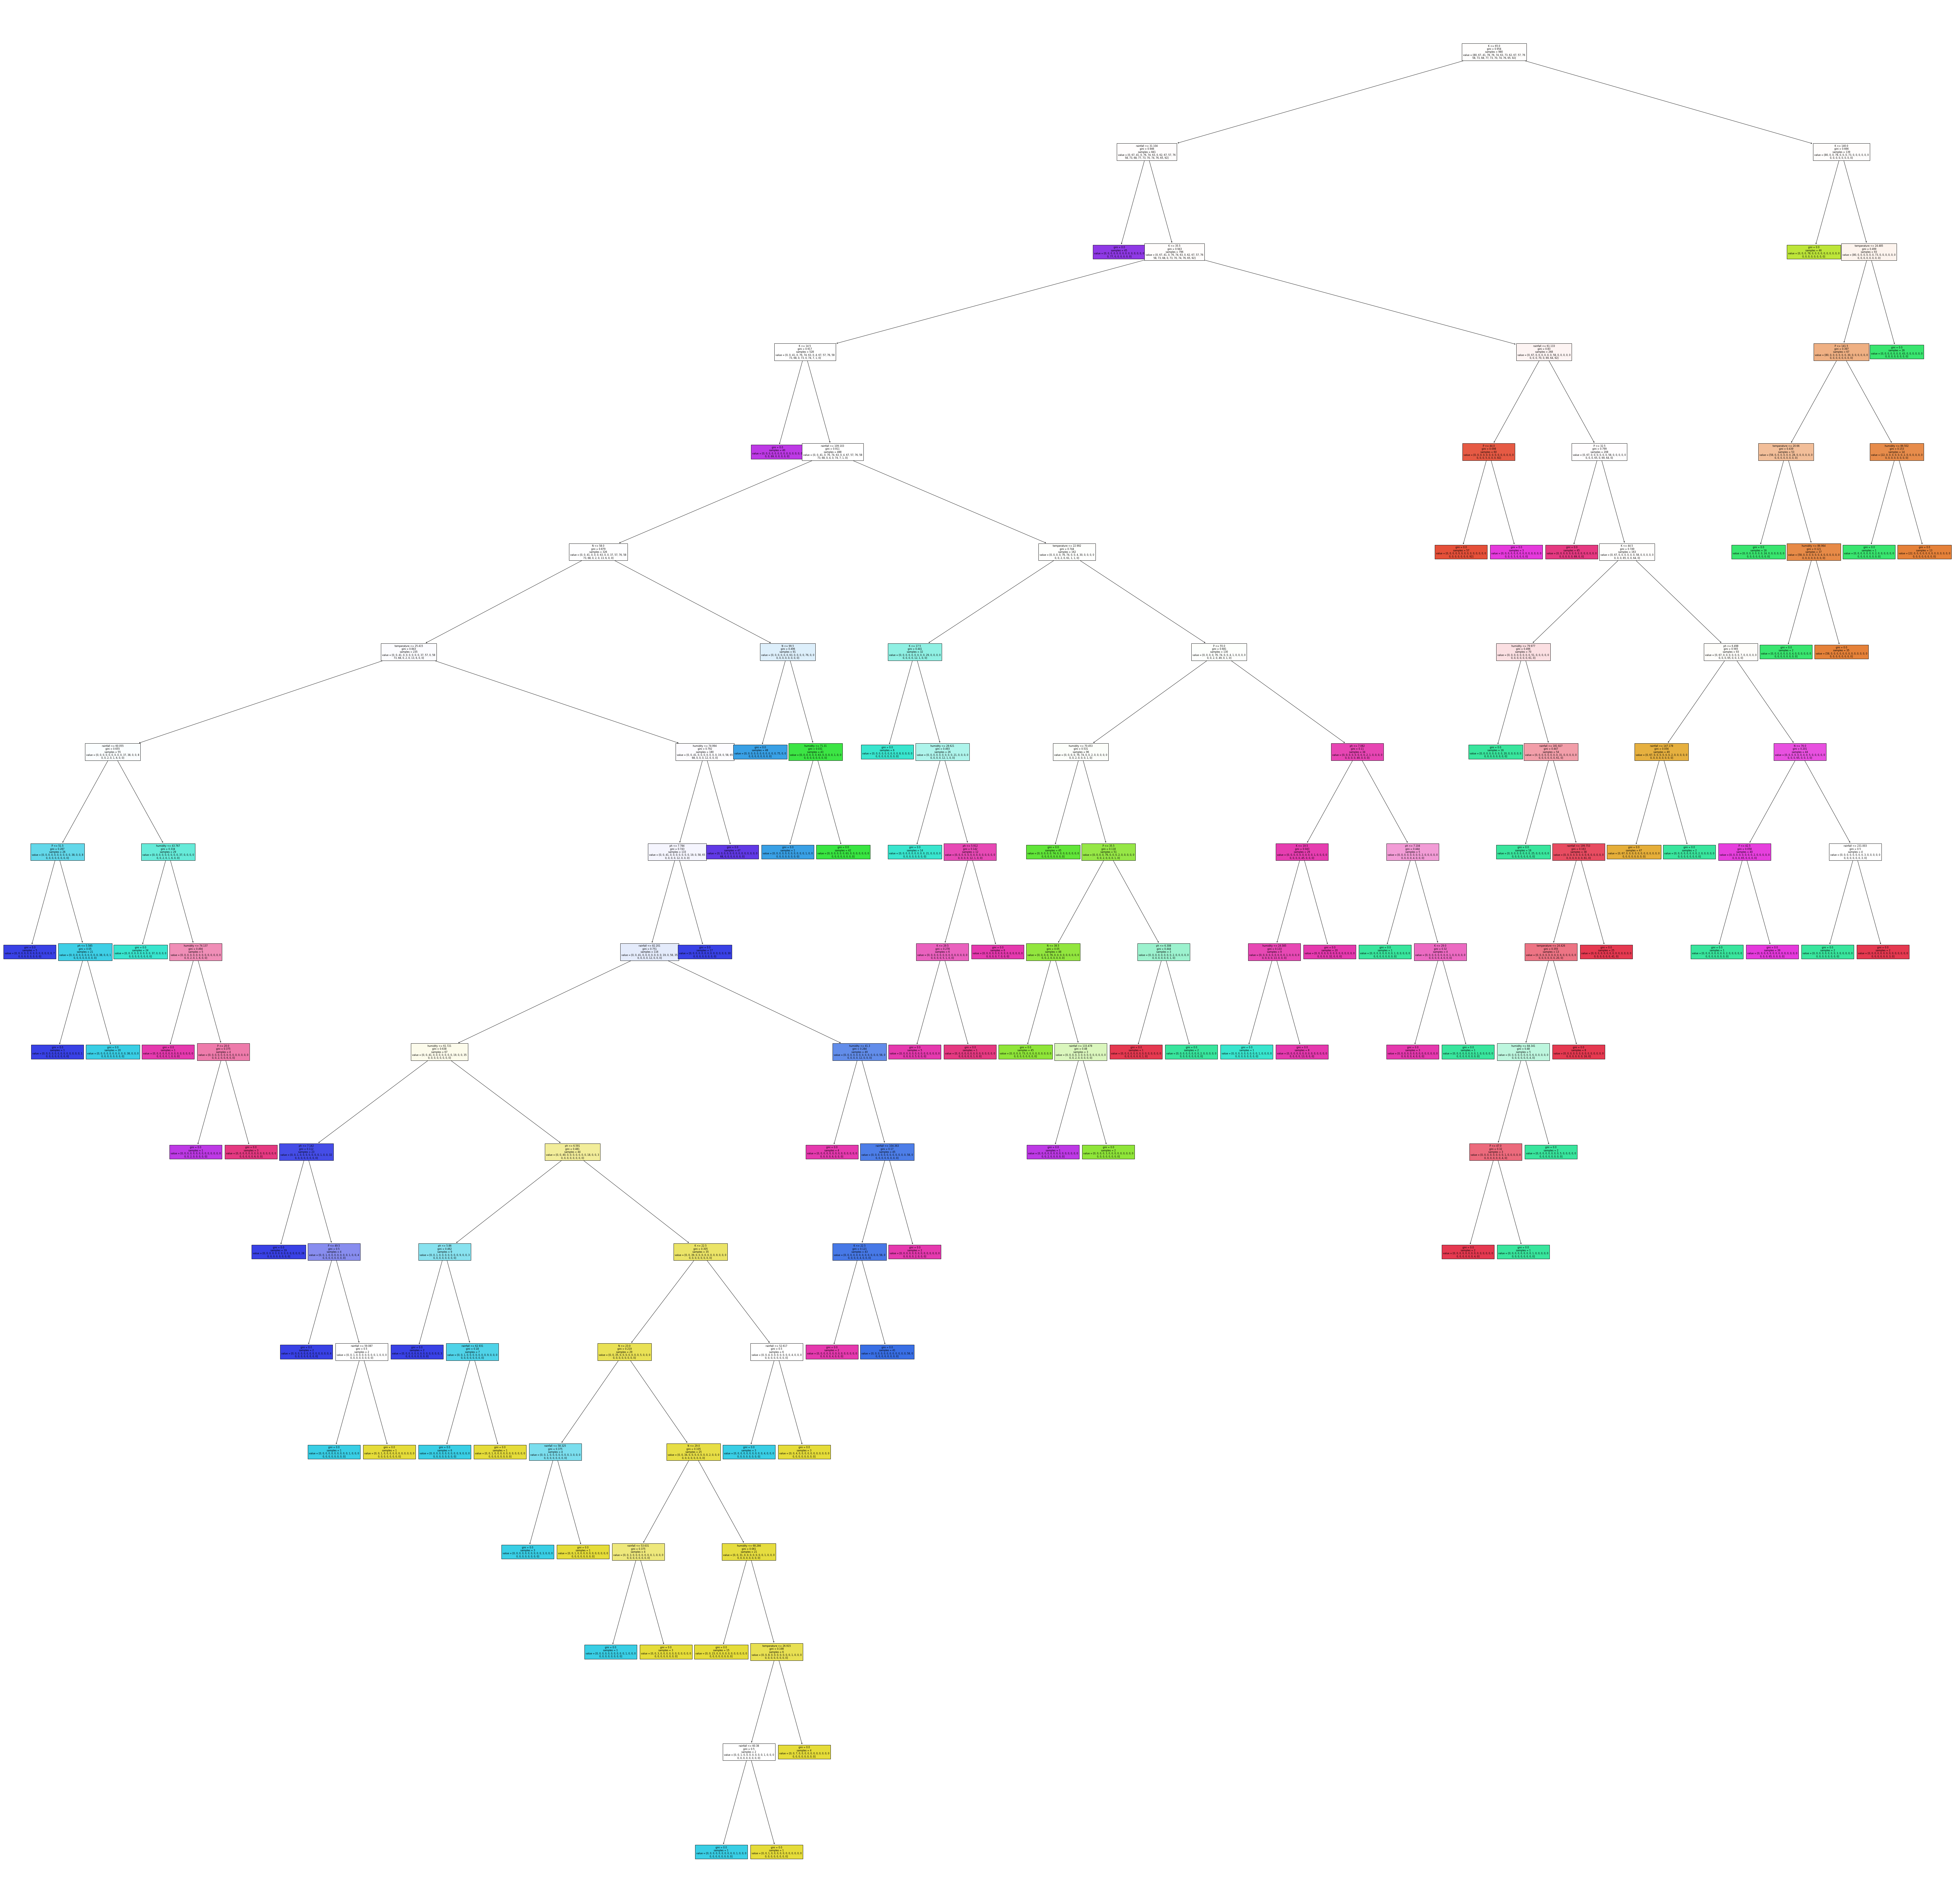

In [26]:
# save plot
plt.figure(figsize=(120,120))
tree.plot_tree(RFC_Model.estimators_[0], feature_names=X_train.columns, filled=True, fontsize=8)
plt.savefig('tree_high_dpi', dpi=100)